<h2 style="color:#e39714"> 🧰 Tools: 🧰 </h2> </center>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

<h2 style="color:#e39714"> 🧰 Producción eólica mundial: 🧰 </h2> </center>

In [2]:
#Eólica por Web scraping

r = requests.get('https://es.wikipedia.org/wiki/Energ%C3%ADa_e%C3%B3lica')
html = r.content
soup = BeautifulSoup(html, 'html.parser')
soup.find_all('table', attrs={'class': 'wikitable sortable'})
html_table = soup.find_all('table', attrs={'class': 'wikitable sortable'})[0]
eólica = pd.read_html(html_table.prettify())[0]

In [3]:
eólica.head(3)

,#,País,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,China,2599,5912,12 210,25 104,44 733,62 733,75 564,91 412,114 763,145 104,168 690,188 232,211 392,236 320,281 993,328 973,365 964
1,2,Estados Unidos,11 603,16 819,25 170,35 159,40 200,46 919,60 007,61 110,65 879,74 472,82 183,89 077,96 665,105 466,117 744,132 738,140 862
2,3,Alemania,20 622,22 247,23 903,25 777,27 214,31 060,34 332,39 250,39 165,44 947,50 019,56 132,59 311,61 357,62 184,63 760,66 315


In [4]:
eólica = eólica.drop(['#'], axis=1)
eólica.set_index(eólica.columns[0], inplace=True)
eólica = eólica.dropna()

In [5]:
for columna in eólica.columns:
    eólica[columna] =  eólica[columna].str.replace(r'\s+', '', regex=True)

eólica = eólica.replace('-', 0, regex=True)
eólica = eólica.apply(pd.to_numeric, errors='coerce').astype(float)

In [6]:
top_20_filas = eólica.nlargest(20, '2006')

In [8]:
eólica30 = eólica.head(20)

In [14]:
eólica

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
País,,,,,,,,,,,,,,,,,
China,2599.0,5912.0,12210.0,25104.0,44733.0,62733.0,75564.0,91412.0,114763.0,145104.0,168690.0,188232.0,211392.0,236320.0,281993.0,328973.0,365964.0
Estados Unidos,11603.0,16819.0,25170.0,35159.0,40200.0,46919.0,60007.0,61110.0,65879.0,74472.0,82183.0,89077.0,96665.0,105466.0,117744.0,132738.0,140862.0
Alemania,20622.0,22247.0,23903.0,25777.0,27214.0,31060.0,34332.0,39250.0,39165.0,44947.0,50019.0,56132.0,59311.0,61357.0,62184.0,63760.0,66315.0
India,6270.0,7850.0,9587.0,10925.0,13064.0,16084.0,18421.0,20150.0,22465.0,27151.0,28665.0,32848.0,35129.0,37506.0,38559.0,40067.0,41930.0
Reino Unido,1963.0,2389.0,3288.0,4070.0,5203.0,6540.0,8445.0,10711.0,12440.0,13603.0,15030.0,18872.0,20970.0,23515.0,24665.0,27130.0,28537.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Luxemburgo,0.0,0.0,0.0,0.0,0.0,45.0,58.0,58.0,58.0,64.0,120.0,120.0,123.0,136.0,136.0,136.0,165.0
Chipre,0.0,0.0,0.0,0.0,0.0,134.0,147.0,147.0,147.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0,158.0
Mongolia,0.0,0.0,0.0,0.0,0.0,1.0,1.0,51.0,51.0,51.0,51.0,101.0,156.0,156.0,156.0,156.0,156.0


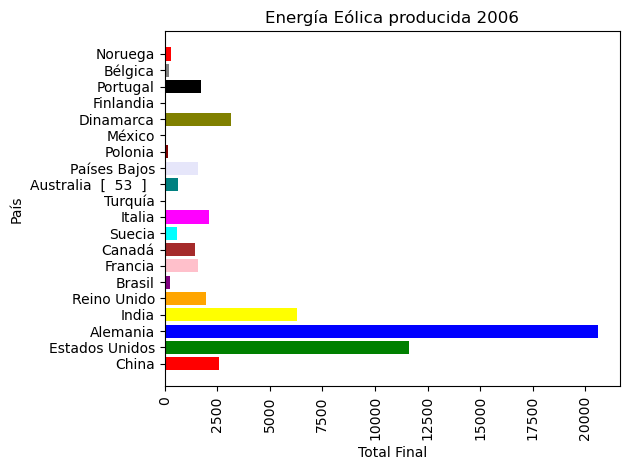

In [18]:
total_final_column = eólica30['2006']

# Crear el histograma con el índice como eje x
plt.barh(eólica30.index, total_final_column, color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black',  'gray'])

# Etiquetas y título
plt.xlabel('Total Final')
plt.ylabel('País')
plt.title('Energía Eólica producida 2006')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el histograma
plt.tight_layout()
plt.show()

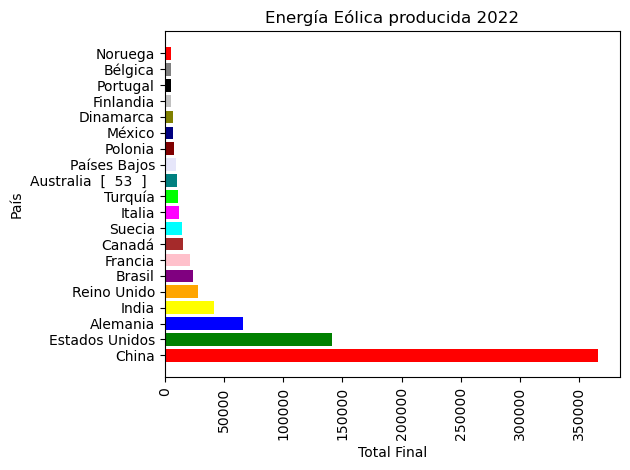

In [17]:
total_final_column = eólica30['2022']

# Crear el histograma con el índice como eje x
plt.barh(eólica30.index, total_final_column, color=['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'cyan', 'magenta', 'lime', 'teal', 'lavender', 'maroon', 'navy', 'olive', 'silver', 'black',  'gray'])

# Etiquetas y título
plt.xlabel('Total Final')
plt.ylabel('País')
plt.title('Energía Eólica producida 2022')

# Rotar etiquetas del eje x para mayor legibilidad
plt.xticks(rotation=90)

# Mostrar el histograma
plt.tight_layout()
plt.show()